In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
csv_dir_path="../data/csv"
lon="139.5000"
lat="35.15"
year=2017
file_path="{0}/{1}/{2}".format(csv_dir_path, lon, lat)

ugrd_file_name="{0}/{1}_{2}_UGRD_{3}.csv".format(file_path, lon, lat, year)
vgrd_file_name="{0}/{1}_{2}_VGRD_{3}.csv".format(file_path, lon, lat, year)

ugrd_data = np.genfromtxt(ugrd_file_name, delimiter=",", dtype='float')
vgrd_data = np.genfromtxt(vgrd_file_name, delimiter=",", dtype='float')

vel = (ugrd_data[:,1]**2 + vgrd_data[:, 1]**2)**0.5
vel

array([  2.88175078,   3.48276174,   2.20122629, ...,  11.817734  ,
        12.42006314,  12.32223679])

0~10


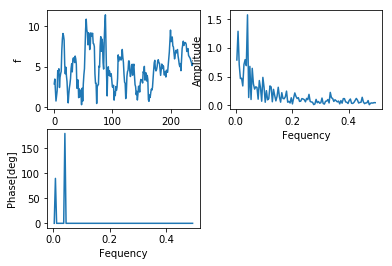

10~20


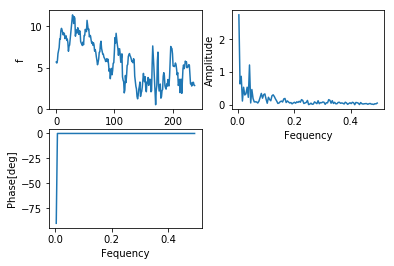

20~30


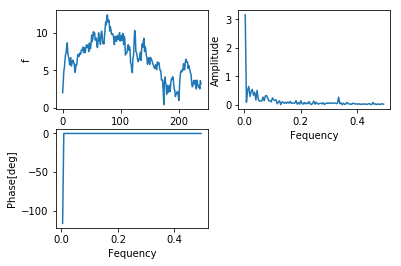

30~40


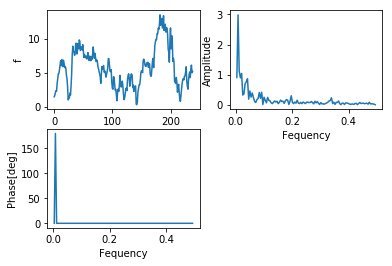

40~50


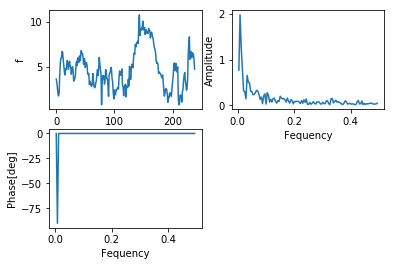

50~60


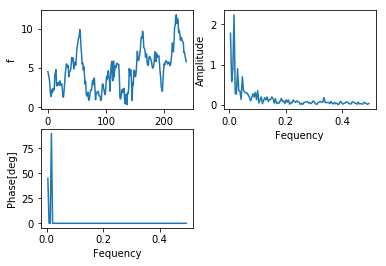

In [81]:
for i in range(6):
    print("{0}~{1}".format(i*10, (i+1)*10))
    f = vel[240*i:240*(i+1)-1]

    # サンプル数
    N = len(f)

    # 高速フーリエ変換
    F = np.fft.fft(f)/(N/2)

    # 直流成分の振幅を揃える
    F[0] = F[0]/2

    # 振幅スペクトル
    amp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in F]  

    # 位相スペクトル
    phase = [np.arctan2(int(c.imag), int(c.real)) for c in F]

    # 周波数軸の値を計算 
    freq = np.fft.fftfreq(len(f))

    # ナイキスト周波数の範囲内のデータのみ取り出し
    freq = freq[1:int(N/2)]
    amp = amp[1:int(N/2)]
    phase = phase[1:int(N/2)]
    # グラフ作成
    plt.figure(1)

    # サンプル(日経平均株価)
    plt.subplot(221)
    plt.plot(f)
    plt.xlabel("Time")
    plt.ylabel("f")

    # 振幅
    plt.subplot(222)
    plt.plot(freq, amp)

    plt.xlabel("Fequency")
    plt.ylabel("Amplitude")

    # 位相
    plt.subplot(223)
    plt.plot(freq, np.degrees(phase))
    plt.xlabel("Fequency")   
    plt.ylabel("Phase[deg]")

    # グラフ表示
    plt.show()
    
    # MSM, 10day

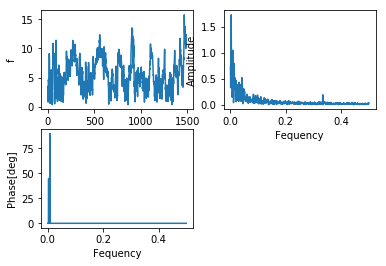

In [86]:
f = vel

# サンプル数
N = len(f)

# 高速フーリエ変換
F = np.fft.fft(f)/(N/2)

# 直流成分の振幅を揃える
F[0] = F[0]/2

# 振幅スペクトル
amp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in F]  

# 位相スペクトル
phase = [np.arctan2(int(c.imag), int(c.real)) for c in F]    

# 周波数軸の値を計算 
freq = np.fft.fftfreq(len(f))

# ナイキスト周波数の範囲内のデータのみ取り出し
freq = freq[1:int(N/2)]
amp = amp[1:int(N/2)]
phase = phase[1:int(N/2)]
# グラフ作成
plt.figure(1)

# サンプル(日経平均株価)
plt.subplot(221)
plt.plot(f)
plt.xlabel("Time")
plt.ylabel("f")

# 振幅
plt.subplot(222)
plt.plot(freq, amp)

plt.xlabel("Fequency")    
plt.ylabel("Amplitude")

# 位相
plt.subplot(223)
plt.plot(freq, np.degrees(phase))
plt.xlabel("Fequency")   
plt.ylabel("Phase[deg]")

# グラフ表示
plt.show()
# 10m, 10day

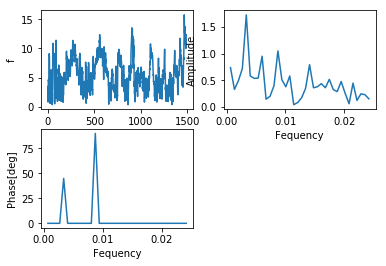

In [88]:
f = vel

# サンプル数
N = len(f)

# 高速フーリエ変換
F = np.fft.fft(f)/(N/2)

# 直流成分の振幅を揃える
F[0] = F[0]/2

# 振幅スペクトル
amp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in F]  

# 位相スペクトル
phase = [np.arctan2(int(c.imag), int(c.real)) for c in F]    

# 周波数軸の値を計算 
freq = np.fft.fftfreq(len(f))

# ナイキスト周波数の範囲内のデータのみ取り出し
freq = freq[1:int(N/40)]
amp = amp[1:int(N/40)]
phase = phase[1:int(N/40)]
# グラフ作成
plt.figure(1)

# サンプル(日経平均株価)
plt.subplot(221)
plt.plot(f)
plt.xlabel("Time")
plt.ylabel("f")

# 振幅
plt.subplot(222)
plt.plot(freq, amp)

plt.xlabel("Fequency")    
plt.ylabel("Amplitude")

# 位相
plt.subplot(223)
plt.plot(freq, np.degrees(phase))
plt.xlabel("Fequency")   
plt.ylabel("Phase[deg]")

# グラフ表示
plt.show()
# 10m, 10day

In [32]:
measure_dir_path="../data/measure"
year=2017

vel_measure=[]
for day in range(1,11):
    for hour in range(0, 24):
        file_name="201707{0:02d}{1:02d}.txt".format(day, hour)
        file_path="{0}/{1}".format(measure_dir_path, file_name)

        measure_data = np.genfromtxt(file_path, dtype='float')
        vel_1h = np.average(measure_data[:, 2])
        vel_measure.append(vel_1h)
vel_measure

[7.7616888888888882,
 8.8922444444444455,
 11.06303888888889,
 13.21554722222222,
 10.405163888888888,
 10.011930555555555,
 4.9582416666666669,
 3.0085916666666668,
 5.0724333333333345,
 4.667877777777778,
 2.397847222222222,
 1.2342138888888887,
 5.7632805555555553,
 9.4572111111111106,
 9.2746444444444425,
 8.1665222222222216,
 6.0268611111111108,
 3.1851500000000001,
 2.8440944444444445,
 4.4436416666666672,
 6.2667611111111121,
 6.7117472222222228,
 5.5661000000000005,
 5.62751388888889,
 5.1163388888888894,
 4.4411944444444442,
 3.5897305555555561,
 2.5449194444444441,
 4.4158694444444437,
 5.1809111111111106,
 3.934530555555555,
 2.7951111111111109,
 2.5632694444444444,
 1.8078333333333334,
 2.609869444444445,
 2.7999111111111112,
 2.5291611111111107,
 2.4695694444444447,
 3.2468444444444442,
 1.6583638888888887,
 2.2876555555555558,
 2.3139305555555554,
 2.1818722222222227,
 0.92542500000000005,
 2.3550166666666663,
 1.4034805555555554,
 1.3958166666666665,
 1.196336111111111,


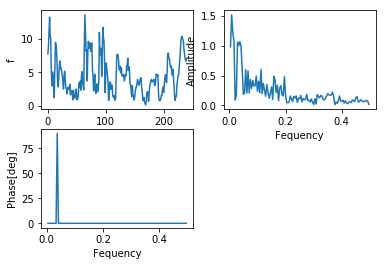

In [45]:
f = np.array(vel_measure)

# サンプル数
N = len(f)

# 高速フーリエ変換
F = np.fft.fft(f)/(N/2)

# 直流成分の振幅を揃える
F[0] = F[0]/2

# 振幅スペクトル
amp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in F]  

# 位相スペクトル
phase = [np.arctan2(int(c.imag), int(c.real)) for c in F]    

# 周波数軸の値を計算 
freq = np.fft.fftfreq(len(f))

# ナイキスト周波数の範囲内のデータのみ取り出し
freq = freq[1:int(N/2)]
amp = amp[1:int(N/2)]
phase = phase[1:int(N/2)]
# グラフ作成
plt.figure(1)

# サンプル(日経平均株価)
plt.subplot(221)
plt.plot(f)
plt.xlabel("Time")
plt.ylabel("f")

# 振幅
plt.subplot(222)
plt.plot(freq, amp)

plt.xlabel("Fequency")    
plt.ylabel("Amplitude")

# 位相
plt.subplot(223)
plt.plot(freq, np.degrees(phase))
plt.xlabel("Fequency")   
plt.ylabel("Phase[deg]")

# グラフ表示
plt.show()
# 平塚1h, 10day

In [58]:
measure_dir_path="../data/measure"
year=2017

vel_measure_10m=[]
for day in range(1,11):
    for hour in range(0, 24):
        file_name="201707{0:02d}{1:02d}.txt".format(day, hour)
        file_path="{0}/{1}".format(measure_dir_path, file_name)

        measure_data = np.genfromtxt(file_path, dtype='float')
        vel = measure_data[:, 2]
        for i in range(0, 6):
            vel_10m = np.average(vel[i*6000:(i+1)*6000])
            vel_measure_10m.append(vel_10m)
vel_measure_10m

[9.4772333333333343,
 8.0866333333333333,
 6.7975166666666675,
 8.0363333333333333,
 8.0470333333333333,
 6.1253833333333336,
 7.0812499999999998,
 9.0135833333333331,
 8.6693833333333341,
 7.9967666666666668,
 9.3372666666666682,
 11.255216666666668,
 10.193050000000001,
 9.6255000000000006,
 12.295366666666666,
 10.367766666666666,
 10.578283333333333,
 13.318266666666664,
 13.940916666666666,
 13.966416666666667,
 13.392316666666666,
 13.475800000000001,
 12.822450000000002,
 11.695383333333332,
 10.515816666666668,
 9.0063666666666666,
 9.058133333333334,
 11.025533333333334,
 11.4323,
 11.392833333333334,
 11.1617,
 11.143216666666667,
 8.7476166666666675,
 9.7439166666666672,
 9.7645,
 9.5106333333333346,
 9.2198499999999992,
 5.3288166666666665,
 4.6113666666666662,
 6.1894,
 2.886683333333333,
 1.5133333333333334,
 1.7360166666666668,
 2.33785,
 3.690866666666667,
 3.1132166666666667,
 3.783433333333333,
 3.3901666666666666,
 4.4793833333333328,
 4.8901000000000003,
 5.36384999

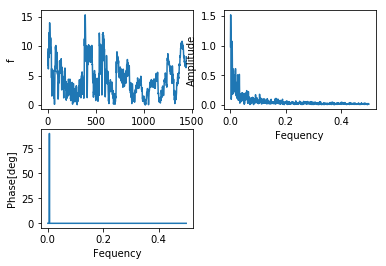

In [60]:
f = np.array(vel_measure_10m)

# サンプル数
N = len(f)

# 高速フーリエ変換
F = np.fft.fft(f)/(N/2)

# 直流成分の振幅を揃える
F[0] = F[0]/2

# 振幅スペクトル
amp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in F]  

# 位相スペクトル
phase = [np.arctan2(int(c.imag), int(c.real)) for c in F]    

# 周波数軸の値を計算 
freq = np.fft.fftfreq(len(f))

# ナイキスト周波数の範囲内のデータのみ取り出し
freq = freq[1:int(N/2)]
amp = amp[1:int(N/2)]
phase = phase[1:int(N/2)]
# グラフ作成
plt.figure(1)

# サンプル(日経平均株価)
plt.subplot(221)
plt.plot(f)
plt.xlabel("Time")
plt.ylabel("f")

# 振幅
plt.subplot(222)
plt.plot(freq, amp)

plt.xlabel("Fequency")    
plt.ylabel("Amplitude")

# 位相
plt.subplot(223)
plt.plot(freq, np.degrees(phase))
plt.xlabel("Fequency")   
plt.ylabel("Phase[deg]")

# グラフ表示
plt.show()

# 平塚10m, 10day

In [65]:
measure_dir_path="../data/measure"
year=2017


file_name="2017070100.txt"
file_path="{0}/{1}".format(measure_dir_path, file_name)

vel_measure_raw = np.genfromtxt(file_path, dtype='float')[:, 2]
vel_measure_raw

array([ 10.3,  10.1,  10.1, ...,   5.6,   5.6,   5.6])

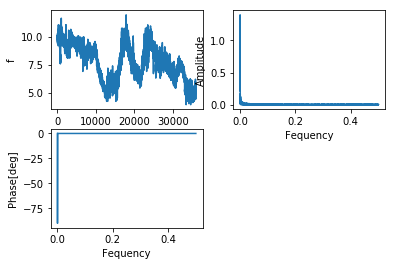

In [89]:
f = np.array(vel_measure_raw)

# サンプル数
N = len(f)

# 高速フーリエ変換
F = np.fft.fft(f)/(N/2)

# 直流成分の振幅を揃える
F[0] = F[0]/2

# 振幅スペクトル
amp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in F]  

# 位相スペクトル
phase = [np.arctan2(int(c.imag), int(c.real)) for c in F]    

# 周波数軸の値を計算 
freq = np.fft.fftfreq(len(f))

# ナイキスト周波数の範囲内のデータのみ取り出し
freq = freq[1:int(N/2)]
amp = amp[1:int(N/2)]
phase = phase[1:int(N/2)]
# グラフ作成
plt.figure(1)

# サンプル(日経平均株価)
plt.subplot(221)
plt.plot(f)
plt.xlabel("Time")
plt.ylabel("f")

# 振幅
plt.subplot(222)
plt.plot(freq, amp)

plt.xlabel("Fequency")    
plt.ylabel("Amplitude")

# 位相
plt.subplot(223)
plt.plot(freq, np.degrees(phase))
plt.xlabel("Fequency")   
plt.ylabel("Phase[deg]")

# グラフ表示
plt.show()

# 平塚0.1s, 1h